<center><font size = "10"> Week 1 <center>
<center><font size = "8"> Homework 01: Integrate-and-Fire neurons <center>

## Exercise 1.1:
Create an integrate-and-fire model neuron with a membrane time constant of 10 milliseconds and a refractory period of 5 milliseconds.

Connect a repetitive stimulus to this.

Simulate the neuron's dynamics multiple times with a fixed stimulus weight of 0.4, varying the stimulus interspike interval between 0.3, 0.5, 1, 2, 5, 8, 12, 15, 20 milliseconds

What do you observe about the relationship between the input rate and output rate? How do you explain this relationship?

Remember that rate = 1 / interval

A qualitative description will do for now. Use markdown cells like this one to write out your descriptions and rationale.
You can make a markdown cell by creating a cell in the notebook, and then clicking on the drop-down "code": 


Hint: define a function to setup and run your simulation with particular values for interval and weight, and use loops to run for a variety of parameter values.



In [14]:
# First we will import the various software libraries we will use in this tutorial
import numpy as np
import matplotlib.pyplot as plt
from neuron import h   # NEURON simulator
_ = h.Section()  # NEURON always requires at least one section, so we make it, but we're not going to use it

In [16]:
neuron1 = h.IntFire1()
neuron1.tau = 10 # membrane time constant (ms)
neuron1.refrac = 5  # refractory pertiod (ms)

regular_stimulus1 = h.NetStim()
regular_stimulus1.interval = 4 # milliseconds between spikes
regular_stimulus1.number = 20 # number of spikes
regular_stimulus1.start = 5 # time in milliseconds when the stimulus starts
conn1 = h.NetCon(regular_stimulus1, neuron1)
conn1.weight[0] = 0.4 # strength of the effect of each spike: IntFire1 uses a resting potential of 0 and a threshold of 1, so a weight of 0.4 means that one event gets it 40% of the way to the threshold

In [17]:
time = h.Vector()
time.record(h._ref_t)  # remember `_ = h.Section()` from the first code block? this only works if we have done that.

input_event_times = h.Vector()
conn1.record(input_event_times)

outconn = h.NetCon(neuron1, None)  # necessary to record neuron1's action potentials
output_event_times = h.Vector()
outconn.record(output_event_times)

0.0

In [32]:
from itertools import product

list(product([1, 2, 3], ["a", "b", "c"]))

[(1, 'a'),
 (1, 'b'),
 (1, 'c'),
 (2, 'a'),
 (2, 'b'),
 (2, 'c'),
 (3, 'a'),
 (3, 'b'),
 (3, 'c')]

In [85]:
def plot_sim(ax, time, Vm_neuron1, input_event_times, output_event_times, interspike_interval, weight):
    ax.plot(time, Vm_neuron1, color=[0.1, 0.1, 0.8], label="membrane potential")  # creates a blue plot of membrane potential over time
    ax.vlines(np.array(input_event_times), ymax=0.3, ymin=0, color='k', label="input times")  # creates vertical black lines
    ax.vlines(np.array(output_event_times), ymax=0.6, ymin=0.3, color='r', label="output times")  # creates vertical red lines
    # ax.set_xlabel('time (ms)')
    # ax.set_ylabel(f'Interval = {interspike_interval} ms\n$V_m$ (mV)')
    # ax.set_title(f"Interval : {interspike_interval} ms. Weight : {weight}", loc='left')
    # ax.legend()

def plot_sims(interspike_intervals, weights)->None:
    f, axes = plt.subplots(len(interspike_intervals), len(weights), figsize = (10, 15), sharex=False)
    axes = axes.reshape(len(interspike_intervals), -1)
    for i, interspike_interval in enumerate(interspike_intervals):
        for j, weight in enumerate(weights):
            ax = axes[i, j]
            run_sim(ax, interspike_interval, weight)
            if i == 0 and j ==0:
                ax.legend()
            if j == 0:
                ax.set_ylabel(f'Interval = {interspike_interval} ms\n$V_m$ (mV)')
            if i == len(interspike_intervals)-1:
                ax.set_xlabel(f'time (ms)\nWeight={weight}')
    plt.tight_layout()
    plt.show()


def run_sim(ax, interspike_interval:float, weight:float):
    """
    Rerun the simulation with any changes made to the neuron model and return the membrane potential
    """
    regular_stimulus1.interval = interspike_interval
    conn1.weight[0] = weight

    stimulus_duration = regular_stimulus1.number * regular_stimulus1.interval + regular_stimulus1.start
    nsteps = int(np.ceil(stimulus_duration / h.dt))
    h.finitialize() 

    Vm_neuron1 = [neuron1.M()]
    for step in range(nsteps):
        h.fadvance()
        Vm_neuron1.append(neuron1.M())
    Vm_neuron1 = np.array(Vm_neuron1)
    # return Vm_neuron1
    
    plot_sim(ax, time, Vm_neuron1, input_event_times, output_event_times, interspike_interval, weight)
    

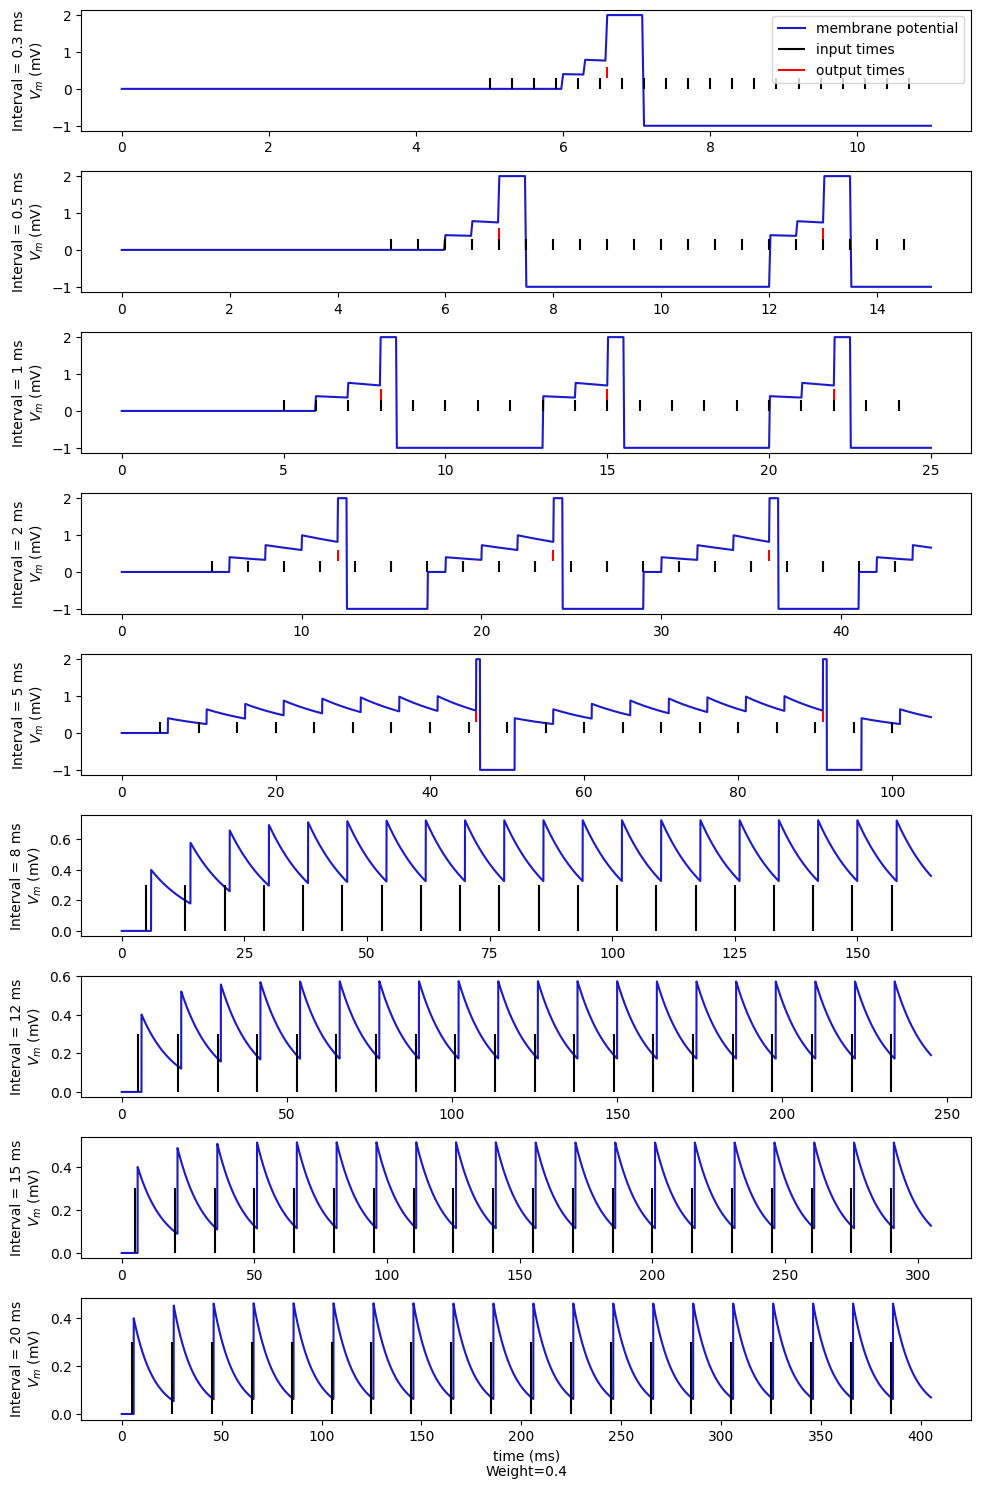

In [86]:
interspike_intervals = [0.3, 0.5, 1, 2, 5, 8, 12, 15, 20]
plot_sims(interspike_intervals, [0.4])

## Exercise 1.2:

Repeat 1.1, but this time varying both the interval and the weight, taking the values 0.2, 0.4, 0.6, 0.8 and 1.0 for the weight.

Plot the relationship between input rate and output rate for different weights on the same axis. How does the weight affect this?

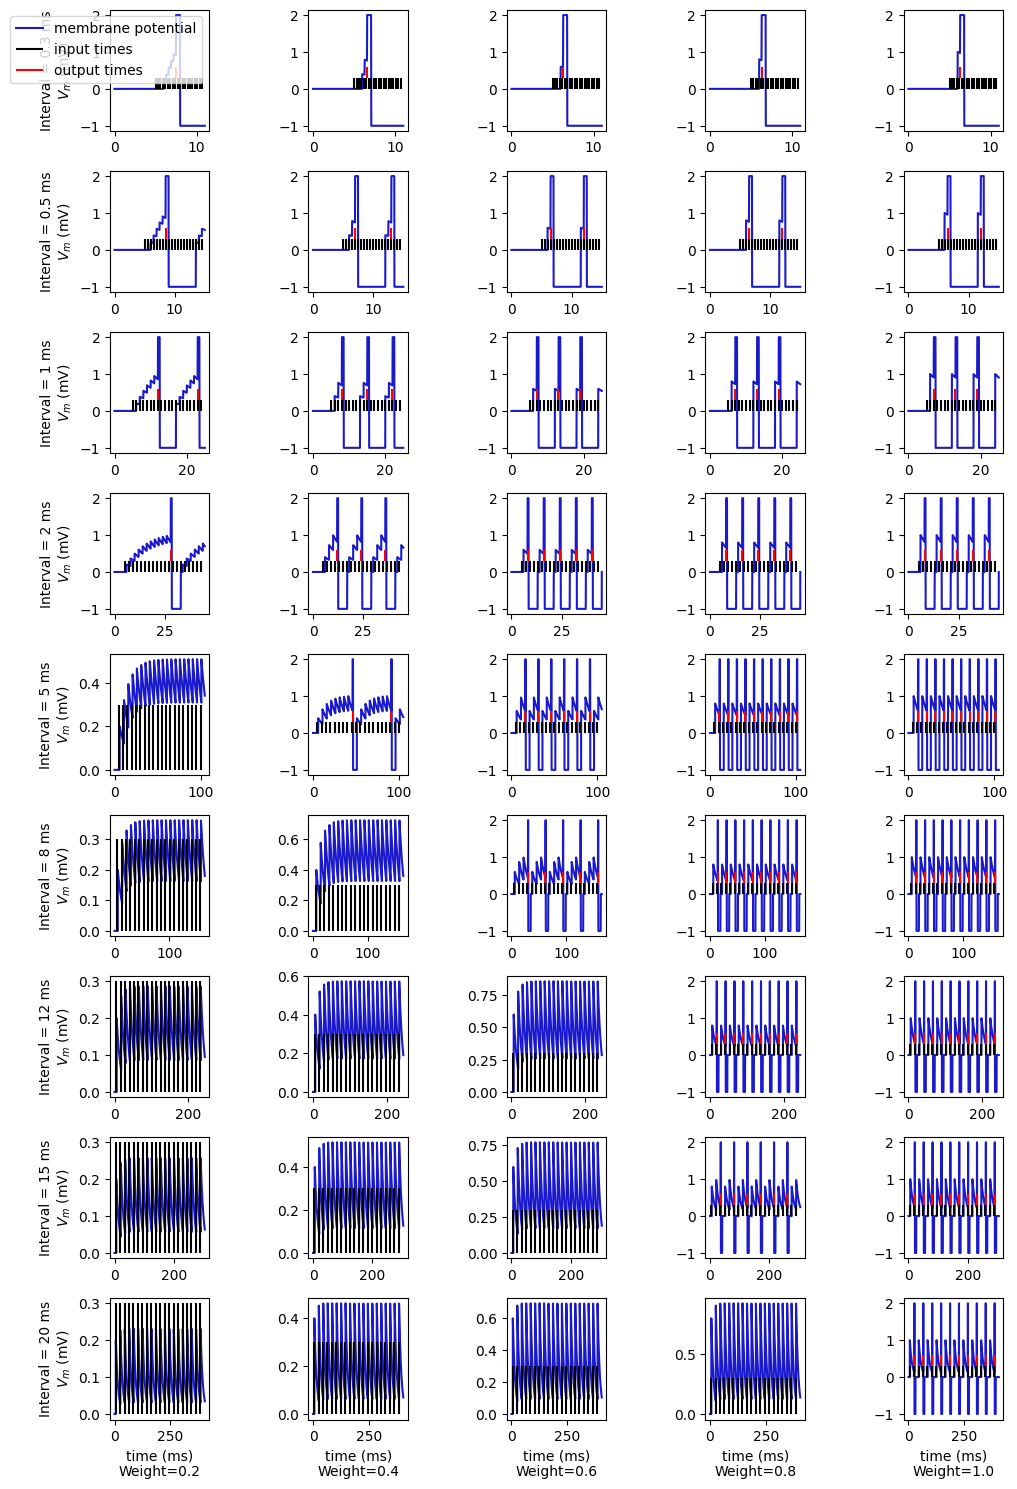

In [87]:
interspike_intervals = [0.3, 0.5, 1, 2, 5, 8, 12, 15, 20]
weights =  [0.2, 0.4, 0.6, 0.8, 1.0]
plot_sims(interspike_intervals, weights)